**Вариант 1:** функция 1, альтернативный вариант 1 (выделение главной части)

Expected result (from table): 432.5 ± 2.8

In [2]:
import ROOT
import math

Welcome to JupyROOT 6.18/04


In [3]:
canvas = ROOT.TCanvas()

### Function
Limits:

In [4]:
ax = 0.01
bx = 1.0

ay = 0.0
by = 1.0

Define function:

In [5]:
def myfunc(var, p):
    x = var[0]
    y = var[1]
    a = p[0]
    return a/(x*x*(y + 0.5*math.sin(x)))

In [6]:
func = ROOT.TF2("func", myfunc, ax, bx, ay, by, 1)
#npar = 1

In [7]:
func.SetParameter(0, 1)
func.GetParameter(0)

1.0

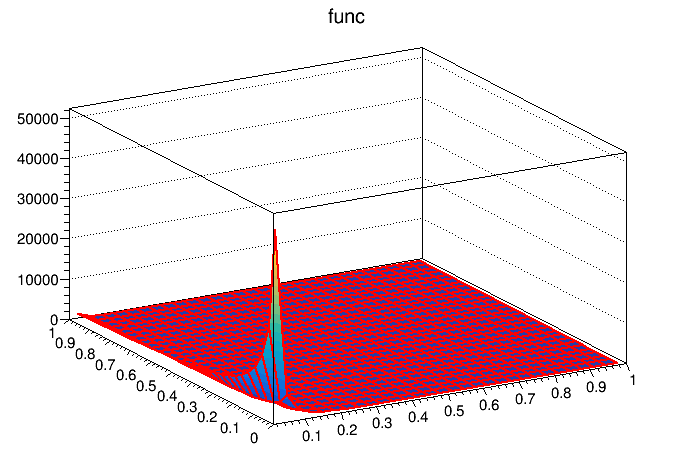

In [8]:
func.Draw("surf1")
canvas.Draw()

In [9]:
func(ax, ay)

2000033.3337222263

### Average method

In [215]:
sumf = 0 #total sum of function values*(bx - ax)*(by - ay)
sumf2 = 0 #total sum of function values*(bx - ax)*(by - ay) squared

number = 1000

for j in range (1, 11):
    
    sumfj = 0 #function values*(bx - ax)*(by - ay) sum in j iteration
    sumfj2 = 0 #total sum of function values squared in j iteration
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = func(xi, yi)
        
        sumfj = sumfj + fi*(bx - ax)*(by - ay)
        sumfj2 = sumfj2 + (fi*(bx - ax)*(by - ay))**2
    
    sumf = sumf + sumfj
    sumf2 = sumf2 + sumfj2
    
    integralj = sumfj/number #integral value in j iteration
    integral = sumf/(j*number) #total integral value after j iterations
    
    
    Dj = sumfj2/number - (integralj)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = sumf2/(j*number) - (integral)**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integral:", integralj, ";  error:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")

1 integral: 428.90836604619693 ;  error: 150.7171256994331
   integral for 1 iterations: 428.90836604619693 ;  error: 150.7171256994331 

2 integral: 276.6092040300276 ;  error: 57.27969815757794
   integral for 2 iterations: 352.7587850381123 ;  error: 80.63531068566886 

3 integral: 772.534073462013 ;  error: 232.91871852956234
   integral for 3 iterations: 492.68388117941254 ;  error: 94.50268482613589 

4 integral: 476.27082417797857 ;  error: 108.24604703052907
   integral for 4 iterations: 488.58061692905403 ;  error: 75.86757611671034 

5 integral: 359.61719764683033 ;  error: 116.5790039743164
   integral for 5 iterations: 462.7879330726093 ;  error: 65.02251767246526 

6 integral: 331.94952267875095 ;  error: 81.79323295861208
   integral for 6 iterations: 440.98153134029957 ;  error: 55.87749339307885 

7 integral: 168.95839284810583 ;  error: 29.23923840436379
   integral for 7 iterations: 402.1210829842719 ;  error: 48.09025365921743 

8 integral: 854.3251380348189 ;  error

In [216]:
print("Total integral value: ", integral)
print("Total error: ", error)

Total integral value:  438.5845853786952
Total error:  53.10680389957525


### Main part method

Split initial function 1/x\*x*(y + 0.5sin(x)) into sum of two functions: "analytical"(f1) and second(f2).
- "Analytical": f1 = 1/x\*x*(y + const). It can be integrated analytical (with pen and paper). Formula defined below. 
- f2 integrated by "average method", as above. 

Results are summed. Error calculated only for "second" integral. 

In [212]:
# constant used in "analytical" part 
c = 0.01

In [205]:
# formula for integrated "analytical" part
def f1_integral(ax, bx, ay, by):
    result = -1*(1/bx - 1/ax)*math.log((by + c)/(ay + c))
    return result

In [206]:
f1_integral(ax, bx, ay, by)

456.8969311672847

In [217]:
# formula for second part f2
def func2(var, p):
    x = var[0]
    y = var[1]
    a = p[0]
    return a*(c - 0.5*math.sin(x))/((x**2)*(y + 0.5*math.sin(x))*(y + c))

In [199]:
f2 = ROOT.TF2("f2", func2, ax, bx, ay, by, 1)

In [200]:
f2.SetParameter(0, 1)

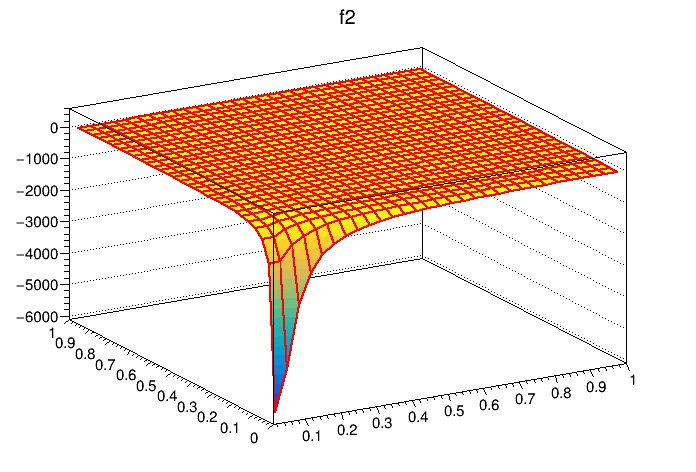

In [207]:
f2.Draw("surf1")
canvas.Draw()

In [211]:
f2_sumf = 0 #total sum of f2 values*(bx - ax)*(by - ay)
f2_sumf2 = 0 #total sum of f2 values*(bx - ax)*(by - ay) squared

number = 1000

for j in range (1, 11):
    
    f2_sumfj = 0 #f2 values*(bx - ax)*(by - ay) sum in j iteration
    f2_sumfj2 = 0 #total sum of f2 values squared in j iteration
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = f2(xi, yi)
        
        f2_sumfj = f2_sumfj + fi*(bx - ax)*(by - ay)
        f2_sumfj2 = f2_sumfj2 + (fi*(bx - ax)*(by - ay))**2
    
    f2_sumf = f2_sumf + f2_sumfj
    f2_sumf2 = f2_sumf2 + f2_sumfj2
    
    integralj = f1_integral(ax, bx, ay, by) + f2_sumfj/number #integral value in j iteration
    integral = f1_integral(ax, bx, ay, by) + f2_sumf/(j*number) #total integral value after j iterations
    
    
    Dj = f2_sumfj2/number - (f2_sumfj/number)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = f2_sumf2/(j*number) - (f2_sumf/(j*number))**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integral:", integralj, ";  error:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")

1 integral: 441.51210248385865 ;  error: 17.656377988661824
   integral for 1 iterations: 441.51210248385865 ;  error: 17.656377988661824 

2 integral: 412.2303227139194 ;  error: 16.96989896180315
   integral for 2 iterations: 426.87121259888903 ;  error: 12.24901899914394 

3 integral: 477.1685003766006 ;  error: 72.15603128516277
   integral for 3 iterations: 443.63697519145956 ;  error: 25.40414065410687 

4 integral: 416.0924539260184 ;  error: 8.078368101297196
   integral for 4 iterations: 436.75084487509923 ;  error: 19.16077098858445 

5 integral: 390.0875059132595 ;  error: 23.2201900690424
   integral for 5 iterations: 427.4181770827313 ;  error: 16.01884080529747 

6 integral: 429.4804763300024 ;  error: 6.462978738382189
   integral for 6 iterations: 427.76189362394314 ;  error: 13.392426505140449 

7 integral: 434.38304627516305 ;  error: 24.914209967968738
   integral for 7 iterations: 428.7077725741174 ;  error: 12.018362305004013 

8 integral: 401.2031524587217 ;  erro

In [214]:
print("Total integral value: ", integral)
print("Total error: ", error)

Total integral value:  438.39885675817516
Total error:  15.11983086246915
